In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import math
import matplotlib.image as mpimg
%matplotlib inline

# Gowalla 

In [2]:
DATA_FOLDER = ''
CENTROIDS = DATA_FOLDER+"centroids.csv"
centroids= pd.read_csv(CENTROIDS)
centroids=centroids.drop('country',axis=1)
centroids['name']=centroids.name.str.lower()
centroids=  centroids[centroids.columns[:3]]
G_TRIPS = DATA_FOLDER+"country_gowalla_trips.csv"
country_gowalla_trips = pd.read_csv(G_TRIPS,delimiter = ',')

In [38]:
centroids

,latitude,longitude,name
0,42.546245,1.601554,andorra
1,23.424076,53.847818,united arab emirates
2,33.939110,67.709953,afghanistan
3,17.060816,-61.796428,antigua and barbuda
4,18.220554,-63.068615,anguilla
...,...,...,...
240,15.552727,48.516388,yemen
241,-12.827500,45.166244,mayotte
242,-30.559482,22.937506,south africa
243,-13.133897,27.849332,zambia


In [39]:
bigG=country_gowalla_trips[country_gowalla_trips['user'] >= 200]

In [40]:
bigG

,country_home,country_checkin,user
284,canada,united states,369
1286,norway,denmark,317
1294,norway,germany,202
1344,norway,sweden,399
1352,norway,united kingdom,201
1794,sweden,denmark,762
1801,sweden,finland,265
1802,sweden,france,428
1805,sweden,germany,671
1821,sweden,italy,272


In [41]:
bigG_merged=bigG.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})


Text(0.5, 1.0, 'Departures from Sweden (Gowalla)')

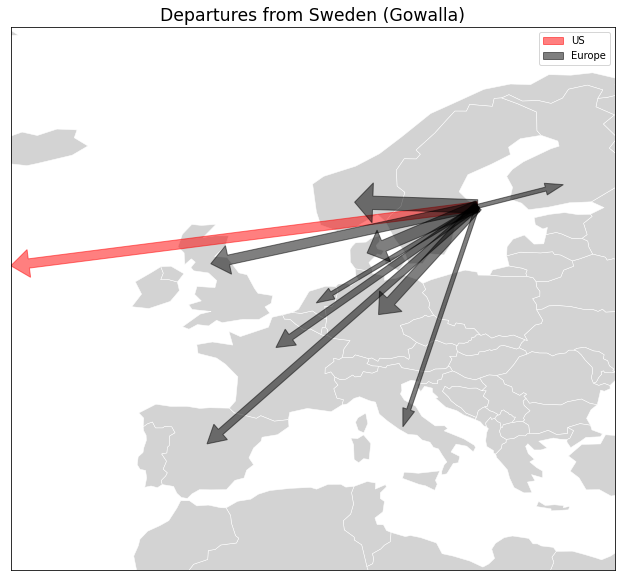

In [42]:
import matplotlib.pyplot as plt
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigG_merged)): 
    if bigG_merged['country_home'].iloc[i]=='sweden': 
        if bigG_merged['country_checkin'].iloc[i]=='united states':
            US=plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], -18.5-bigG_merged['longitude_h'].iloc[i], 55.4-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/800, color = 'red',label='US',head_length=1.5,alpha=0.5)
        else: 
            europe=plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], bigG_merged['longitude_ch'].iloc[i]-bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_ch'].iloc[i]-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/800, label='EU', color = 'black', head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([30,75])
plt.xlim([-20,30])
plt.legend([US,europe],['US','Europe'])
US.axes.get_xaxis().set_visible(False)
US.axes.get_yaxis().set_visible(False)
plt.title('Departures from Sweden (Gowalla)',fontsize='xx-large')

Text(0.5, 1.0, 'Departures from the US (Gowalla)')

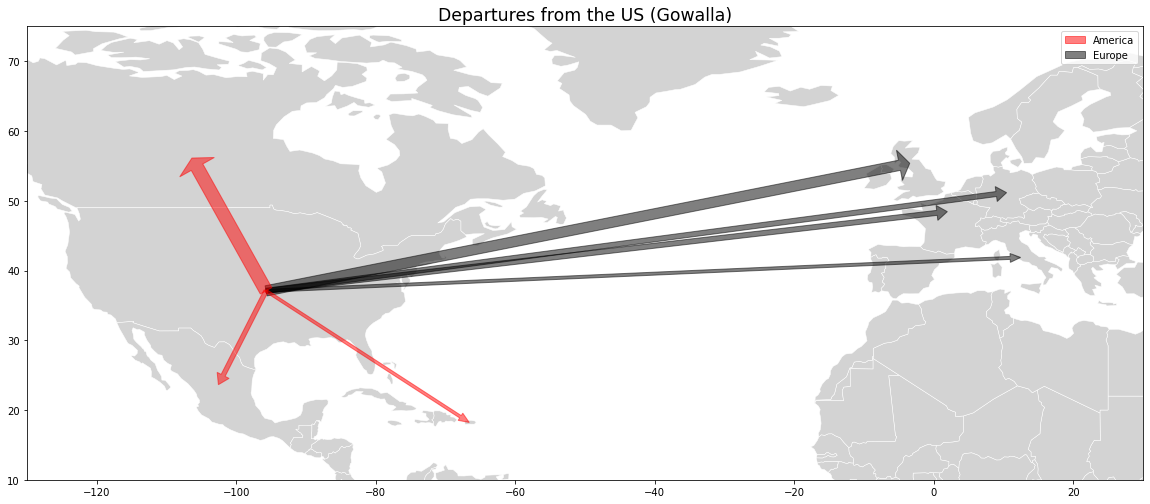

In [43]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigG_merged)): 
    if bigG_merged['country_home'].iloc[i]=='united states':  
        if  bigG_merged['country_checkin'].iloc[i] in ['canada', 'mexico', 'puerto rico']: 
            color ='red'
            US = plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], bigG_merged['longitude_ch'].iloc[i]-bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_ch'].iloc[i]-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
        else: 
            color='black'
            europe = plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], bigG_merged['longitude_ch'].iloc[i]-bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_ch'].iloc[i]-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([10,75])
plt.xlim([-130,30])
plt.legend([US,europe],['America','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Departures from the US (Gowalla)',fontsize='xx-large')

# Brightkite

In [7]:
B_TRIPS = DATA_FOLDER+"country_brightkite_trips.csv"
country_brightkite_trips = pd.read_csv(B_TRIPS,delimiter = ',')

In [45]:
Big_B_Sweden=country_brightkite_trips[country_brightkite_trips['country_home'] == 'sweden'][country_brightkite_trips['user'] >= 50]

C:\Users\cyril\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
bigB = country_brightkite_trips[country_brightkite_trips['user'] >= 50]

In [14]:
bigB_merged=bigB.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})
#bigB_Sweden_merged=Big_B_Sweden.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})


In [48]:
bigB_Sweden_merged

,country_home,country_checkin,user,latitude_h,longitude_h,latitude_ch,longitude_ch
0,sweden,denmark,85,60.128161,18.643501,56.263920,9.501785
1,sweden,germany,68,60.128161,18.643501,51.165691,10.451526
2,sweden,norway,67,60.128161,18.643501,60.472024,8.468946
3,sweden,united kingdom,61,60.128161,18.643501,55.378051,-3.435973
4,sweden,united states,82,60.128161,18.643501,37.090240,-95.712891


In [3]:
countriespop = pd.read_csv('countriespop.csv', index_col = 0)

In [12]:
countriespop

,country,count_brightkite,population_brightkite,count_normalized_brightkite,count_gowalla,population_gowalla,count_normalized_gowalla
0,united states,30669,298444215,0.000103,50639,298444215,0.000170
1,united kingdom,3243,60609153,0.000054,5435,60609153,0.000090
2,australia,1452,20264082,0.000072,1311,20264082,0.000065
3,canada,1409,33098932,0.000043,2210,33098932,0.000067
4,germany,1344,82422299,0.000016,5213,82422299,0.000063
5,sweden,833,9016596,0.000092,18029,9016596,0.002000
6,netherlands,789,16491461,0.000048,1259,16491461,0.000076
7,italy,614,58133509,0.000011,860,58133509,0.000015
8,norway,593,4610820,0.000129,3662,4610820,0.000794
9,spain,492,40397842,0.000012,980,40397842,0.000024


Text(0.5, 1.0, 'Departures from the US (Brightkite)')

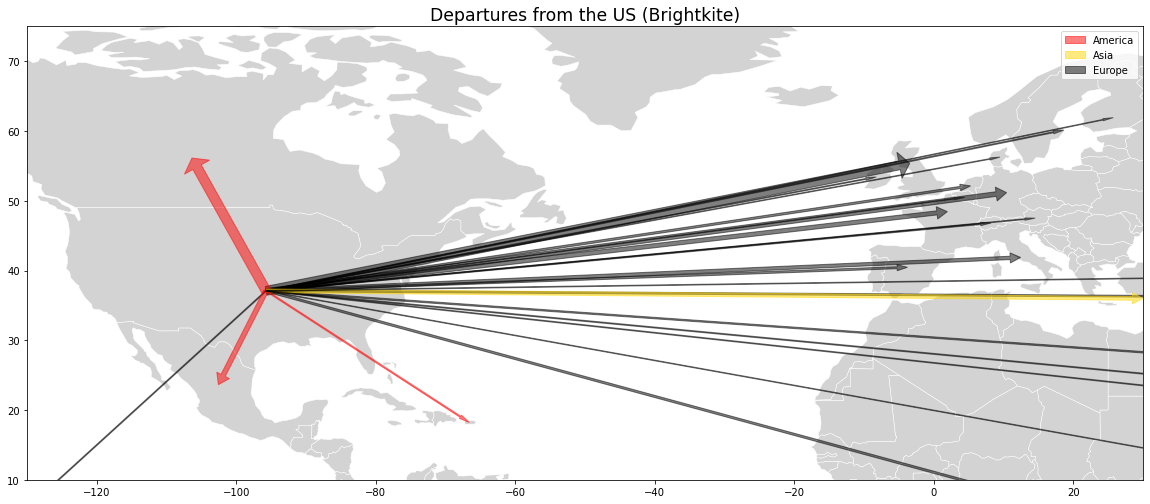

In [49]:
n = 500     #normalization factor

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigB_merged)): 
    if bigB_merged['country_home'].iloc[i]=='united states':  
        if  bigB_merged['country_checkin'].iloc[i] in ['canada', 'mexico', 'puerto rico']: 
            color='red'
            america=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], bigB_merged['longitude_ch'].iloc[i]-bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_ch'].iloc[i]-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/n, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
        elif  bigB_merged['country_checkin'].iloc[i] == 'japan': 
            color='gold'
            asia=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], 30-bigB_merged['longitude_h'].iloc[i], 36-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/n, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
        else: 
            color='black'
            europe=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], bigB_merged['longitude_ch'].iloc[i]-bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_ch'].iloc[i]-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/n, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([10,75])
plt.xlim([-130,30])
plt.legend([america, asia, europe], ['America','Asia','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Departures from the US (Brightkite)',fontsize='xx-large')

Text(0.5, 1.0, 'Departures from Sweden (Brightkite)')

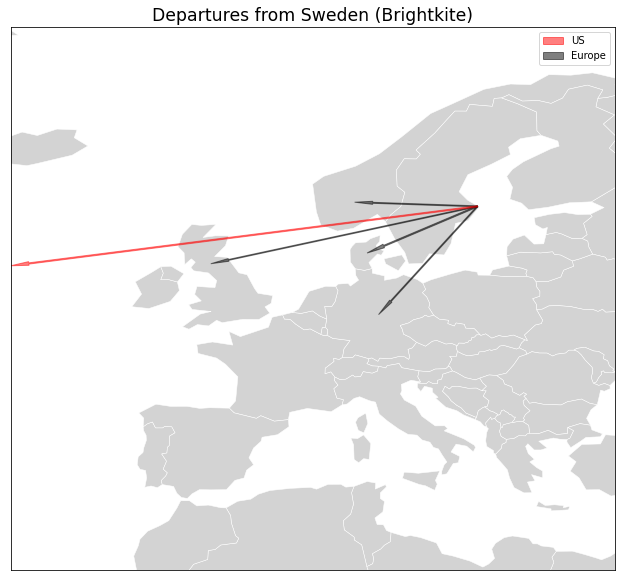

In [50]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigB_Sweden_merged)): 
    if bigB_Sweden_merged['country_checkin'].iloc[i]=='united states':
        US=plt.arrow(bigB_Sweden_merged['longitude_h'].iloc[i], bigB_Sweden_merged['latitude_h'].iloc[i], -18.5-bigB_Sweden_merged['longitude_h'].iloc[i], 55.4-bigB_Sweden_merged['latitude_h'].iloc[i],width =bigB_Sweden_merged['user'].iloc[i]/800, color = 'red',label='US',head_length=1.5,alpha=0.5)
    else: 
        europe=plt.arrow(bigB_Sweden_merged['longitude_h'].iloc[i], bigB_Sweden_merged['latitude_h'].iloc[i], bigB_Sweden_merged['longitude_ch'].iloc[i]-bigB_Sweden_merged['longitude_h'].iloc[i], bigB_Sweden_merged['latitude_ch'].iloc[i]-bigB_Sweden_merged['latitude_h'].iloc[i],width =bigB_Sweden_merged['user'].iloc[i]/800, label='EU', color = 'black', head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([30,75])
plt.xlim([-20,30])
plt.legend([US,europe],['US','Europe'])
US.axes.get_xaxis().set_visible(False)
US.axes.get_yaxis().set_visible(False)
plt.title('Departures from Sweden (Brightkite)',fontsize='xx-large')

In [66]:
np.array(bigB_merged['country_checkin'].drop_duplicates())

array(['united kingdom', 'united states', 'austria', 'france', 'italy',
       'switzerland', 'china', 'germany', 'denmark', 'sweden', 'norway',
       'australia', 'belgium', 'canada', 'ireland', 'netherlands',
       'spain', 'cook islands', 'finland', 'hong kong', 'india', 'japan',
       'mexico', 'puerto rico', 'singapore', 'thailand', 'turkey'],
      dtype=object)

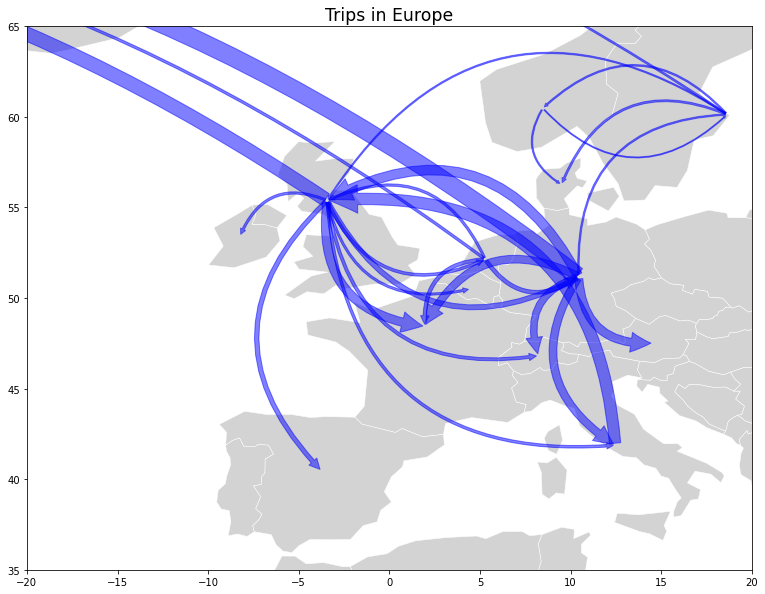

In [11]:
import matplotlib.patches as patches

Europe = ['united kingdom', 'germany', 'austria', 'italy', 'switzerland', 'denmark', 'sweden', 'norway',
       'belgium', 'ireland', 'netherlands', 'spain', 'finland', 'turkey']

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
colors = ['blue', 'red', 'green', 'yellow']
for i in range(len(bigB_merged)): 
    if (bigB_merged['country_home'].iloc[i] in Europe) and (bigB_merged['country_checkin'].iloc[i] in Europe+['france', 'united states']):  
        #color='black'
        n = 100000*countriespop[countriespop['country']== bigB_merged['country_home'].iloc[i]].iat[0,3]
        #europe=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], bigB_merged['longitude_ch'].iloc[i]-bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_ch'].iloc[i]-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/n, color = colors[i%4], head_length=1.5,alpha=0.5,length_includes_head=True, overhang = 0.5)
        plt.gca().add_patch(patches.FancyArrowPatch((bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i]), (bigB_merged['longitude_ch'].iloc[i], bigB_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", color = 'blue', alpha = 0.5, mutation_scale = bigB_merged['user'].iloc[i]/n, label = bigB_merged['user'].iloc[i]))

   
        
plt.ylim([35,65])
plt.xlim([-20,20])
#plt.legend([america, asia, oceania, europe], ['America','Asia','Oceania','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Trips in Europe',fontsize='xx-large')
plt.savefig('Europe.png')

## restart

In [170]:
B_TRIPS = DATA_FOLDER+"country_brightkite_trips.csv"
country_brightkite_trips = pd.read_csv(B_TRIPS,delimiter = ',')
countries = pd.read_csv('countriespop.csv', index_col = 0)

In [171]:
country_brightkite_trips.head(3)

,country_home,country_checkin,user
0,algeria,france,1
1,angola,portugal,1
2,argentina,benin,2


In [172]:
countries.head(3)

,country,count_brightkite,population_brightkite,count_normalized_brightkite,count_gowalla,population_gowalla,count_normalized_gowalla
0,united states,30669,298444215,0.000103,50639,298444215,0.000170
1,united kingdom,3243,60609153,0.000054,5435,60609153,0.000090
2,australia,1452,20264082,0.000072,1311,20264082,0.000065


In [173]:
B_merged=country_brightkite_trips.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})
B_merged.head(3)

,country_home,country_checkin,user,latitude_h,longitude_h,latitude_ch,longitude_ch
0,algeria,france,1,28.033886,1.659626,48.441411,1.957488
1,australia,france,29,-25.274398,133.775136,48.441411,1.957488
2,austria,france,6,47.516231,14.550072,48.441411,1.957488


In [174]:
B_merged = B_merged.merge(countries[['country', 'count_normalized_brightkite']], left_on='country_home', right_on='country').drop('country', axis = 1)
B_merged.head(3)

,country_home,country_checkin,user,latitude_h,longitude_h,latitude_ch,longitude_ch,count_normalized_brightkite
0,australia,france,29,-25.274398,133.775136,48.441411,1.957488,0.000072
1,australia,brazil,2,-25.274398,133.775136,-14.235004,-51.925280,0.000072
2,australia,czech republic,2,-25.274398,133.775136,49.817492,15.472962,0.000072


In [175]:
B_merged['trips_normalized'] = B_merged['user']/B_merged['count_normalized_brightkite']

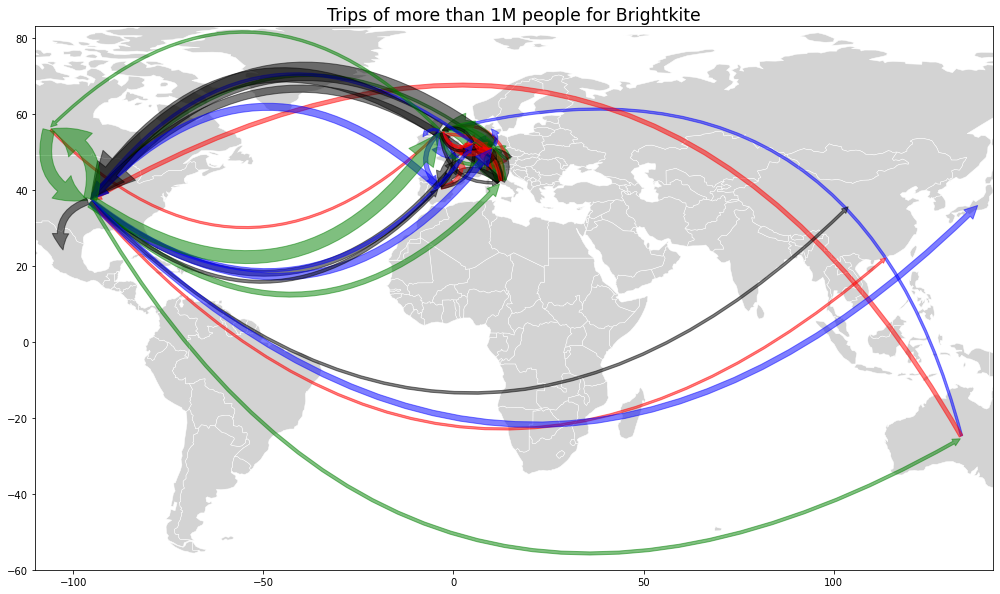

In [204]:
import matplotlib.patches as patches

Europe = ['united kingdom', 'germany','france', 'austria', 'italy', 'switzerland', 'denmark', 'sweden', 'norway',
       'belgium', 'ireland', 'netherlands', 'spain', 'finland', 'turkey']

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
colors = ['blue', 'red', 'green', 'k']
for i in range(len(B_merged)): 
    if  B_merged['trips_normalized'].iloc[i]>1000000:
        n = 100000#europe=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], bigB_merged['longitude_ch'].iloc[i]-bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_ch'].iloc[i]-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/n, color = colors[i%4], head_length=1.5,alpha=0.5,length_includes_head=True, overhang = 0.5)
        plt.gca().add_patch(patches.FancyArrowPatch((B_merged['longitude_h'].iloc[i], B_merged['latitude_h'].iloc[i]), (B_merged['longitude_ch'].iloc[i], B_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", color = colors[i%4], alpha = 0.5, mutation_scale = B_merged['trips_normalized'].iloc[i]/n))

   
        
plt.ylim([-60,83])
plt.xlim([-110,142])
#plt.legend([america, asia, oceania, europe], ['America','Asia','Oceania','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Trips of more than 1M people for Brightkite',fontsize='xx-large')
plt.savefig('NotEurope.png')

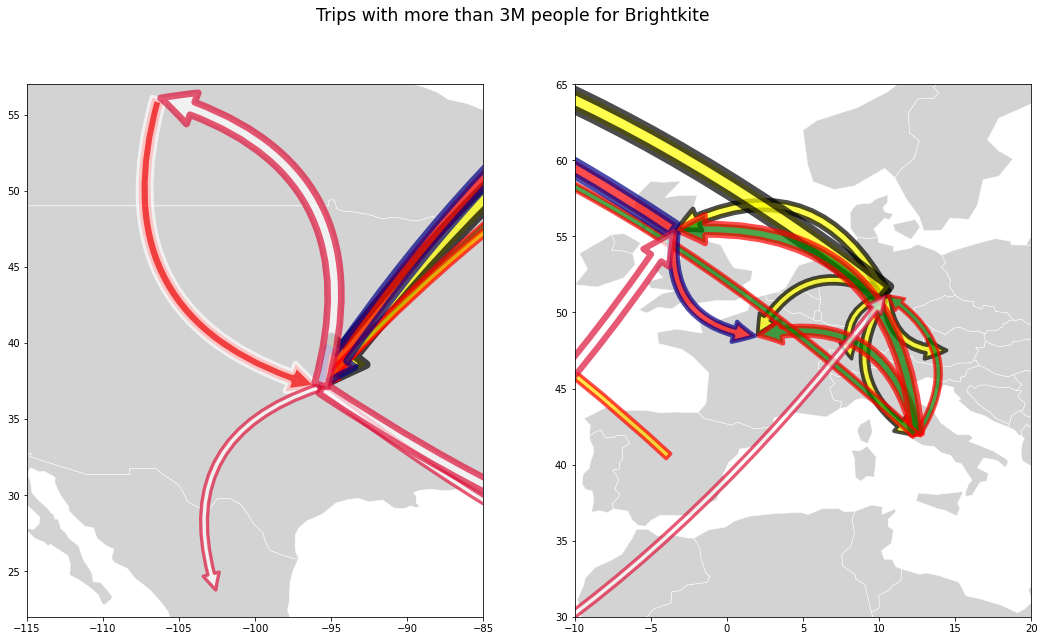

In [203]:
import matplotlib.patches as patches

BigWorld = pd.DataFrame([['united states', 'white', 'crimson'], ['canada', 'red', 'white'],['united kingdom', 'red', 'darkblue'], ['austria', 'white', 'firebrick'], ['germany', 'yellow','black'], ['italy', 'green', 'red'], ['spain', 'gold', 'red']], columns = ['country', 'color', 'edgecolor'])

fig, ax = plt.subplots(1,2, figsize = [18, 10])

for k in [0,1]:
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', ax = ax[k])
    for i in range(len(B_merged)): 
        country = B_merged['country_home'].iloc[i]
        if  B_merged['trips_normalized'].iloc[i]>3000000:# and (country in list(BigWorld['country'])):
            col= BigWorld[BigWorld['country'] == country].iat[0, 1]
            edgecol = BigWorld[BigWorld['country'] == country].iat[0, 2]
            n = 100000
            ax[k].add_patch(patches.FancyArrowPatch((B_merged['longitude_h'].iloc[i], B_merged['latitude_h'].iloc[i]), (B_merged['longitude_ch'].iloc[i], B_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", facecolor = col, edgecolor = edgecol, linewidth = B_merged['trips_normalized'].iloc[i]/(10*n), alpha = 0.7, mutation_scale = B_merged['trips_normalized'].iloc[i]/n))

ax[0].set_xlim([-115,-85])
ax[0].set_ylim([22, 57])
ax[1].set_xlim([-10, 20])
ax[1].set_ylim([30, 65])
#plt.legend([america, asia, oceania, europe], ['America','Asia','Oceania','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
fig.suptitle('Trips with more than 3M people for Brightkite',fontsize='xx-large')
plt.savefig('World.png')

The only countries are Italy, Germany, Spain, the Netherlands, Switzerland, Austria and the UK : one color for each

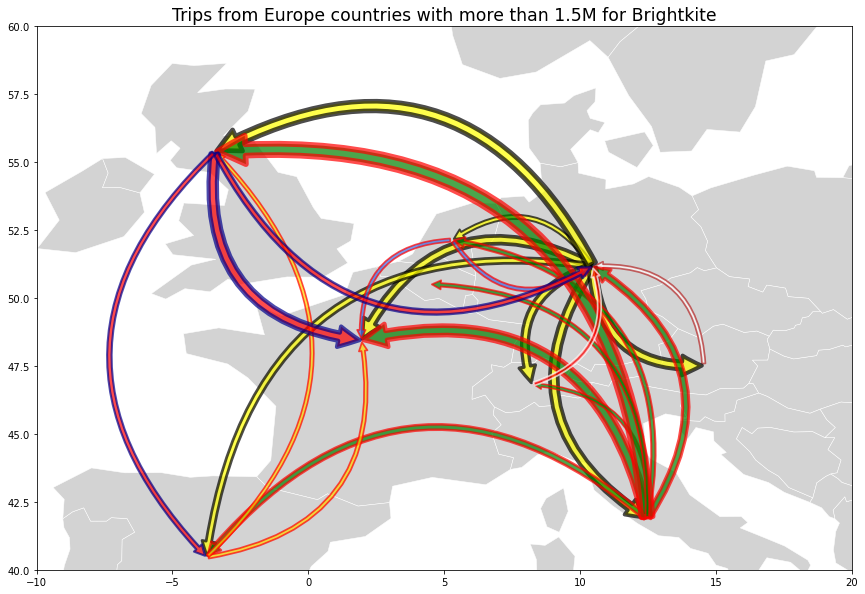

In [206]:
import matplotlib.patches as patches

BigEurope = pd.DataFrame([['austria', 'white', 'firebrick'], ['switzerland', 'red', 'white'], ['netherlands', 'royalblue', 'red'], ['united kingdom', 'red', 'darkblue'], ['austria', 'white', 'firebrick'], ['germany', 'yellow','black'], ['italy', 'green', 'red'], ['spain', 'gold', 'red']], columns = ['country', 'color', 'edgecolor'])

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(B_merged)): 
    country = B_merged['country_home'].iloc[i]
    if  B_merged['trips_normalized'].iloc[i]>1500000 and (country in list(BigEurope['country'])) and not (B_merged['country_checkin'].iloc[i] == 'united states'):
        col= BigEurope[BigEurope['country'] == country].iat[0, 1]
        edgecol = BigEurope[BigEurope['country'] == country].iat[0, 2]
        n = 100000
        plt.gca().add_patch(patches.FancyArrowPatch((B_merged['longitude_h'].iloc[i], B_merged['latitude_h'].iloc[i]), (B_merged['longitude_ch'].iloc[i], B_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", facecolor = col, edgecolor = edgecol, linewidth = B_merged['trips_normalized'].iloc[i]/(10*n), alpha = 0.7, mutation_scale = B_merged['trips_normalized'].iloc[i]/n))

   
        
plt.ylim([40,60])
plt.xlim([-10,20])
#plt.legend([america, asia, oceania, europe], ['America','Asia','Oceania','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Trips from Europe countries with more than 1.5M for Brightkite',fontsize='xx-large')
plt.savefig('Europe.png')

Now the same for Gowalla : 

In [182]:
G_TRIPS = DATA_FOLDER+"country_gowalla_trips.csv"
country_gowalla_trips = pd.read_csv(G_TRIPS,delimiter = ',')

In [184]:
G_merged=country_gowalla_trips.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})
G_merged = G_merged.merge(countries[['country', 'count_normalized_gowalla']], left_on='country_home', right_on='country').drop('country', axis = 1)
G_merged.head(3)

,country_home,country_checkin,user,latitude_h,longitude_h,latitude_ch,longitude_ch,count_normalized_gowalla
0,austria,belgium,10,47.516231,14.550072,50.503887,4.469936,0.000075
1,austria,united arab emirates,5,47.516231,14.550072,23.424076,53.847818,0.000075
2,austria,united kingdom,25,47.516231,14.550072,55.378051,-3.435973,0.000075


In [187]:
G_merged['trips_normalized'] = G_merged['user']/G_merged['count_normalized_gowalla']

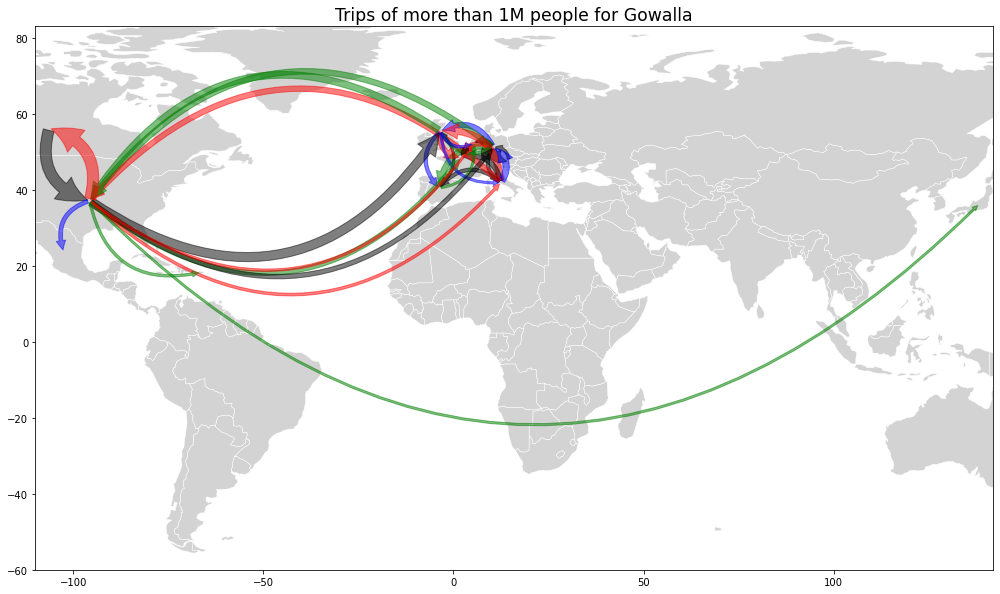

In [188]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
colors = ['blue', 'red', 'green', 'k']                                             #random color to distinguish different fluxes
for i in range(len(G_merged)): 
    if  G_merged['trips_normalized'].iloc[i]>1000000:
        n = 100000
        plt.gca().add_patch(patches.FancyArrowPatch((G_merged['longitude_h'].iloc[i], G_merged['latitude_h'].iloc[i]), (G_merged['longitude_ch'].iloc[i], G_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", color = colors[i%4], alpha = 0.5, mutation_scale = G_merged['trips_normalized'].iloc[i]/n))

plt.ylim([-60,83])
plt.xlim([-110,142])
plt.title('Trips of more than 1M people for Gowalla',fontsize='xx-large')
plt.savefig('NotEuropeG.png')

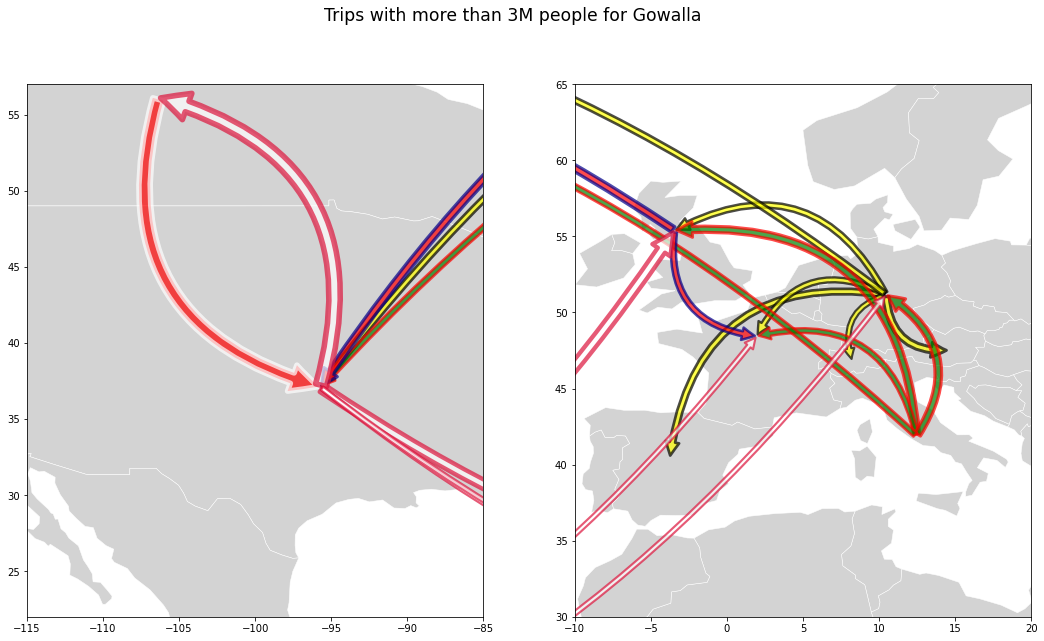

In [191]:
BigWorld = pd.DataFrame([['united states', 'white', 'crimson'], ['canada', 'red', 'white'],['united kingdom', 'red', 'darkblue'], ['austria', 'white', 'firebrick'], ['germany', 'yellow','black'], ['italy', 'green', 'red'], ['spain', 'gold', 'red']], columns = ['country', 'color', 'edgecolor'])

fig, ax = plt.subplots(1,2, figsize = [18, 10])

for k in [0,1]:
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', ax = ax[k])
    for i in range(len(G_merged)): 
        country = G_merged['country_home'].iloc[i]
        if  G_merged['trips_normalized'].iloc[i]>2000000:
            col= BigWorld[BigWorld['country'] == country].iat[0, 1]
            edgecol = BigWorld[BigWorld['country'] == country].iat[0, 2]
            n = 100000
            ax[k].add_patch(patches.FancyArrowPatch((G_merged['longitude_h'].iloc[i], G_merged['latitude_h'].iloc[i]), (G_merged['longitude_ch'].iloc[i], G_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", facecolor = col, edgecolor = edgecol, linewidth = G_merged['trips_normalized'].iloc[i]/(10*n), alpha = 0.7, mutation_scale = G_merged['trips_normalized'].iloc[i]/n))

ax[0].set_xlim([-115,-85])
ax[0].set_ylim([22, 57])
ax[1].set_xlim([-10, 20])
ax[1].set_ylim([30, 65])
fig.suptitle('Trips with more than 3M people for Gowalla',fontsize='xx-large')
plt.savefig('World.png')

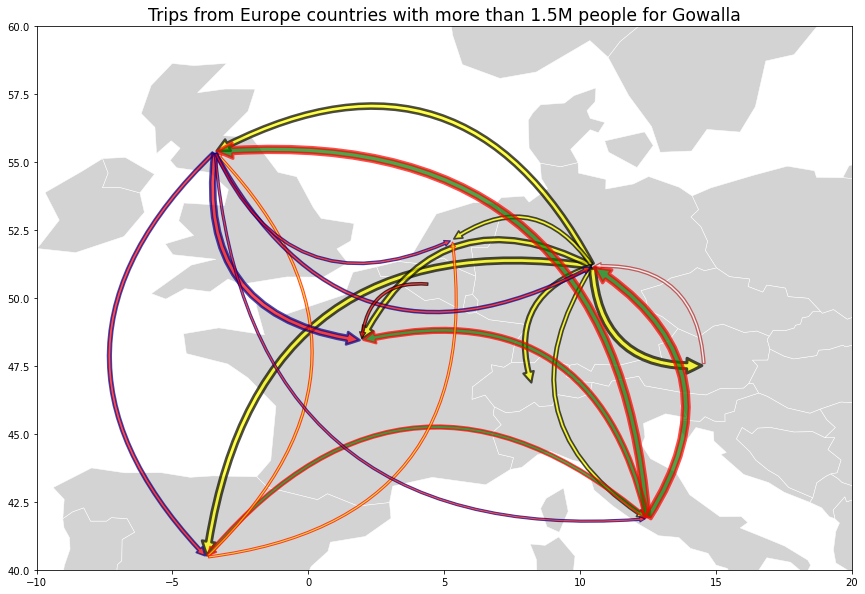

In [208]:
BigEurope = pd.DataFrame([['austria', 'white', 'firebrick'], ['belgium', 'red', 'black'], ['united kingdom', 'red', 'darkblue'], ['austria', 'white', 'firebrick'], ['germany', 'yellow','black'], ['italy', 'green', 'red'], ['spain', 'gold', 'red']], columns = ['country', 'color', 'edgecolor'])

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(G_merged)): 
    country = G_merged['country_home'].iloc[i]
    if  G_merged['trips_normalized'].iloc[i]>1000000 and (country in list(BigEurope['country'])) and not (G_merged['country_checkin'].iloc[i] == 'united states'):
        col= BigEurope[BigEurope['country'] == country].iat[0, 1]
        edgecol = BigEurope[BigEurope['country'] == country].iat[0, 2]
        n = 100000
        plt.gca().add_patch(patches.FancyArrowPatch((G_merged['longitude_h'].iloc[i], G_merged['latitude_h'].iloc[i]), (G_merged['longitude_ch'].iloc[i], G_merged['latitude_ch'].iloc[i]),connectionstyle="arc3,rad=.5", facecolor = col, edgecolor = edgecol, linewidth = G_merged['trips_normalized'].iloc[i]/(10*n), alpha = 0.7, mutation_scale = G_merged['trips_normalized'].iloc[i]/n))
        
plt.ylim([40,60])
plt.xlim([-10,20])
plt.title('Trips from Europe countries with more than 1.5M people for Gowalla',fontsize='xx-large')
plt.savefig('EuropeG.png')